In [8]:
import sys
import os

sys.path.append(os.path.abspath("../"))

import numpy as np
from collections import defaultdict
import seaborn as sns
from matplotlib.patches import Patch

from Testing.Testing import Test
from lib.Game.Environment import BJEnvironment
import matplotlib.pyplot as plt

VERSION = 2
COMPLETEDVERSION = 2
EPOCH = 18

In [14]:
def get_obs(player_sum, dealer_card, usable_ace):
    # player_sum, dealer_sum, usable_ace, split_pos, double_pos, prob_21, game_state
    has_double = True
    prob_21 = 95
    game_state = 0
    has_split = 0
    state = np.array(
        [
            player_sum,
            dealer_card,
            usable_ace,
            has_split,
            has_double,
            prob_21,
            game_state,
        ]
    )
    state = state.astype(np.uint8)
    state = np.reshape(state, [1, 7])
    return state


def create_grid(model, usable_ace = False):
    policy = defaultdict(int)

    for cardP in range(4,22):
        for cardD in range(1,11):
            obs = get_obs(cardP, cardD, usable_ace)
            obs = np.reshape(obs, [1, 7])
            policy[(cardP, cardD, usable_ace)] = model.predict(obs)

    player_count, dealer_count = np.meshgrid(
        # players count, dealers face-up card
        np.arange(4, 22),
        np.arange(1, 11),
    )

    """
    valueHS = np.apply_along_axis(
        lambda obs: policy[(obs[0], obs[1], usable_ace)],
        axis = 2,
        arr=np.dstack([player_count, dealer_count])
    )
    valueHS_grid = player_count, dealer_count, valueHS

    valueSD = np.apply_along_axis(
        lambda obs: policy[(obs[0], obs[1], usable_ace)],
        axis=2,
        arr=np.dstack([player_count, dealer_count]),
    )
    
    valueSD_grid = player_count, dealer_count, valueSD   
    """
    policy_grid = np.apply_along_axis(
        lambda obs: np.argmax(policy[(obs[0], obs[1], usable_ace)]),
        axis=2,
        arr=np.dstack([player_count, dealer_count]),
    )
    return policy_grid
    """
    return policy_grid, valueHS_grid, valueSD_grid
    """
def create_plots(policy_grid, title:str):
    """"
    player_count, dealer_count, valueHS = valueHS_grid
    player_count, dealer_count, valueSD = valueSD_grid
    """
    fig = plt.figure(figsize=plt.figaspect(0.4))
    fig.suptitle(title, fontsize=16)
    """ 
    ax1 = fig.add_subplot(1,2,1,projection ="3d")
    ax1.plot_surface(
        player_count,
        dealer_count,
        valueHS,
        rstride = 1,
        cstride = 1,
        cmap = "viridis",
        edgecolor = "none"
    )

    plt.xticks(range(12,22), range(12,22))
    plt.yticks(range(1,11) + list(range(1,11)))
    ax1.set_title(f"State values, Hit & Stand: {title}")
    ax1.set_xlabel("Player sum")
    ax1.set_ylabel("Dealer showing")
    ax1.zaxis.set_rotate_label(False)
    ax1.set_zlabel("Value", fontsize=14, rotation=90)
    ax1.view_init(20,200)

    ax2 = fig.add_subplot(1, 2, 2, projection="3d")
    ax2.plot_surface(
        player_count,
        dealer_count,
        valueSD,
        rstride=1,
        cstride=1,
        cmap="viridis",
        edgecolor="none",
    )

    plt.xticks(range(12, 22), range(12, 22))
    plt.yticks(range(1, 11) + list(range(1, 11)))
    ax2.set_title(f"State values, Hit & Stand: {title}")
    ax2.set_xlabel("Player sum")
    ax2.set_ylabel("Dealer showing")
    ax2.zaxis.set_rotate_label(False)
    ax2.set_zlabel("Value", fontsize=14, rotation=90)
    ax2.view_init(20, 200)
    """
    
    fig.add_subplot(1,2,1)
    ax3 = sns.heatmap(policy_grid, linewidth=0, annot=True, cmap="Accent_r", cbar=False)
    ax3.set_title(f"Policy: {title}")
    ax3.set_xlabel("Player sum")
    ax3.set_ylabel("Dealer showing")
    ax3.set_xticklabels(range(4,22))
    ax3.set_yticklabels(list(range(1,11)),fontsize=12)

    legend_elements = [
        Patch(facecolor="black", edgecolor="black", label="Hit"),
        Patch(facecolor="yellow", edgecolor="black", label="Stand"),
        Patch(facecolor="orange", edgecolor="black", label="Double"),
        Patch(facecolor="green", edgecolor="black", label="Split")
    ]
    ax3.legend(handles=legend_elements,bbox_to_anchor=(1.3,1))
    return fig

In [10]:
env = BJEnvironment()
test = Test()

test.ModelClass.loadCheckpoint(VERSION, COMPLETEDVERSION, EPOCH)
#test.ModelClass.loadModel(VERSION, COMPLETEDVERSION)

print(test.ModelClass.model.get_weights())
obs = env.observation_space.sample()
obs = np.reshape(obs, [1, env.state_size])
print(obs)
print(test.ModelClass.model.predict(obs))

test.ModelClass.predict(obs)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 256)               2048      
                                                                 
 dense_5 (Dense)             (None, 2)                 514       
                                                                 
Total params: 2562 (10.01 KB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
[array([[-0.03576005, -0.04737921, -0.10462626, ..., -0.16523705,
        -0.08267558, -0.30818737],
       [-0.06811281,  0.02099533, -0.04892878, ..., -0.06180026,
        -0.20791498, -0.40110323],
       [ 0.08765815, -0.02952499,  0.06358257, ..., -0.13348079,
        -0.07673808,  0.03814122],
       ...,
       [-0.02716348, -0.22598553, -0.1106431 , ..., -0.1271805 ,
        -0.26933685, -0.22103508],
   

0

In [11]:
policy_grids_na = create_grid(test.ModelClass.model, False)
policy_grids = create_grid(test.ModelClass.model, True)

1/1 [==============================] - 0s 44ms/step


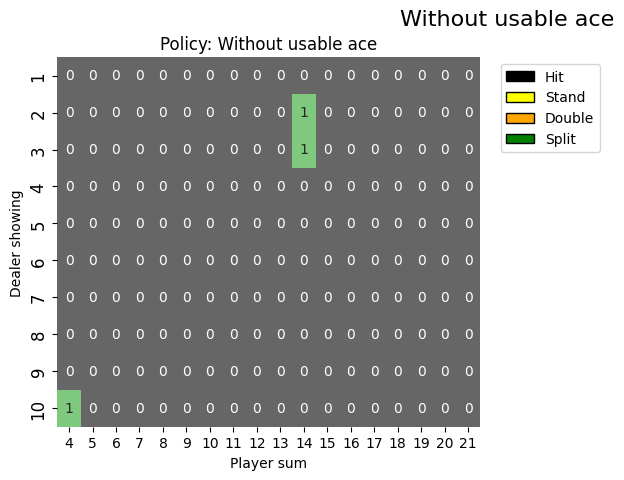

In [12]:
fig1 = create_plots(policy_grids_na, title="Without usable ace")

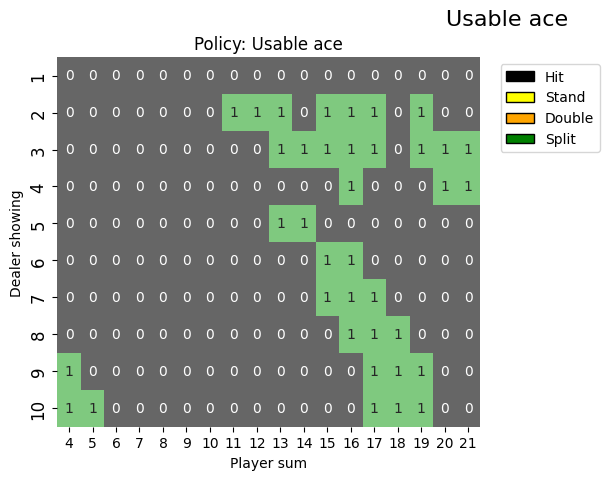

In [13]:
fig2 = create_plots(policy_grids, title="Usable ace")